# <center>Курсовой проект</center>

## 1. Постановка задачи

В обучающей выборке заданы данные по ценам на недвижимость в зависимости от совокупности параметров. Требуется выполнить предобработку данных, построить модель прогнозирования цен на недвижимость и оценить ее качество. На тестовых данных применить полученную модель, предсказав цены на недвижимость.

## 2. Загрузка данных

#### Подключение библиотек

In [1]:
import numpy as np
import pandas as pd

import statistics

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score as r2, mean_squared_error as mse

from sklearn.model_selection import GridSearchCV

#### Задание путей к файлам

In [2]:
TRAIN_DATASET_PATH = 'data/train.csv'
TEST_DATASET_PATH = 'data/test.csv'
RESULT_DATASET_PATH = 'MVITER_predictions.csv'

#### Загрузка тренировочных данных

In [3]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)

### Получение первичного представления о данных

#### Просмотр случайных 6 записей тренировочных данных

In [4]:
train_df.sample(n = 6)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8688,3673,49,1.0,40.717644,25.714105,6.0,5,9.0,1970,0.020741,B,B,24,5613,5,1340.0,2,5,B,172357.598726
2674,14060,23,1.0,55.167584,33.957914,9.0,12,17.0,2012,0.075779,B,B,6,1437,3,NaN,0,2,B,118852.949809
4302,14999,23,1.0,34.023935,NaN,0.0,6,4.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,63587.764061
4004,4435,30,2.0,65.665172,NaN,1.0,8,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,182824.309938
8733,7050,187,1.0,37.763894,21.144337,6.0,5,10.0,2000,0.041116,B,B,53,14892,4,NaN,1,4,B,120639.827740
8258,10660,5,2.0,79.025250,NaN,10.0,11,20.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,428767.264304


**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [5]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [6]:
train_df["DistrictId"].unique()

array([ 27,  22,   1,  94,  99,  44,  59,   6,   2,  88,  93,  90,  36,
        96,  48,   8,  45,  63,  20,   7, 103,  67,  24,  23,  38, 100,
        74,  35,   9, 167, 119, 129,   4,  62, 173,  37,  60, 111, 124,
       157, 138, 147,  66,  42,  41,  58,  75,  81, 110,   5,  57,  77,
        11,  61, 120, 121, 101,  32,  21, 140,  46,  91,  30,   0,  33,
        85,  17,  56,  84, 137, 143,  31,  53, 163, 200,  78, 182,  73,
        70,  98,  54,  55,   3, 159,  50,  49,  52, 127,  28,  83,  29,
       194,  47, 128,  12, 187,  80, 170,  34, 205,  79, 105, 123,  39,
       142, 176, 130,  13,  15,  25,  89, 169, 113, 108, 132, 186, 106,
        10, 139, 151, 144,  69, 189, 152, 125, 109,  40, 162,  72, 154,
        64,  26,  18, 164,  71,  82,  86, 155, 122, 112, 126, 166, 117,
       116,  95,  87,  92, 168, 136, 165, 150,  68, 191, 145,  43, 188,
       193, 146, 104,  51, 158,  97, 153, 161, 149, 107, 177, 118, 114,
       156, 160,  14,  19, 135, 148, 131, 134, 183, 185, 190, 14

### Исключение поля id и DistrictId

In [7]:
train_df = train_df.drop('Id', axis =1 )
train_df = train_df.drop('DistrictId', axis =1 )
# train_df исключил, так как не знаю, как его правильно обработать. Заменять числами от 1 до N? 
# Преобразовывать в бинарные переменные - слишком их много будет. 
# Но с другой стороны этот параметр должен иметь значение, ведь это фактически район, который должен влиять на цену.

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          10000 non-null  float64
 1   Square         10000 non-null  float64
 2   LifeSquare     7887 non-null   float64
 3   KitchenSquare  10000 non-null  float64
 4   Floor          10000 non-null  int64  
 5   HouseFloor     10000 non-null  float64
 6   HouseYear      10000 non-null  int64  
 7   Ecology_1      10000 non-null  float64
 8   Ecology_2      10000 non-null  object 
 9   Ecology_3      10000 non-null  object 
 10  Social_1       10000 non-null  int64  
 11  Social_2       10000 non-null  int64  
 12  Social_3       10000 non-null  int64  
 13  Healthcare_1   5202 non-null   float64
 14  Helthcare_2    10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
 16  Shops_2        10000 non-null  object 
 17  Price          10000 non-null  float64
dtypes: floa

# 3. EDA: визуализация данных

#### Распределение целевой переменной

In [9]:
target = train_df['Price']
train_df.drop('Price', axis=1, inplace=True)

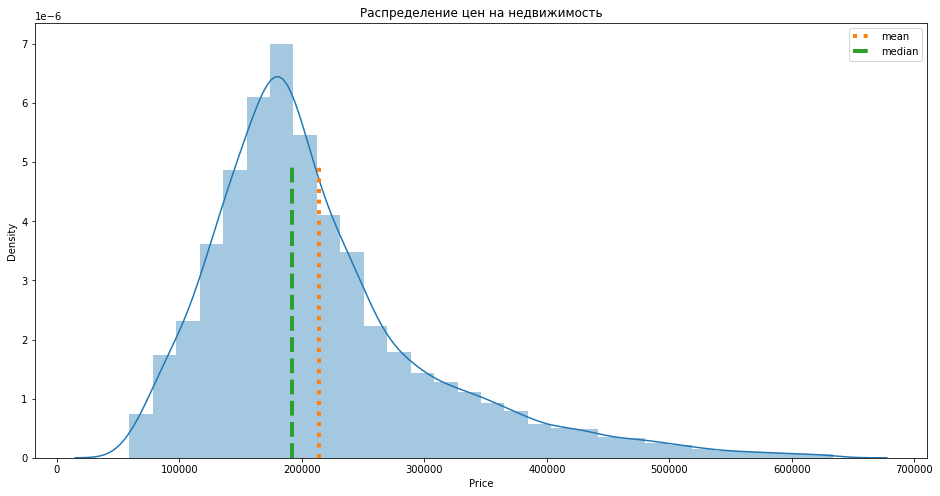

In [10]:
target_mean = round(target.mean(), 2)
target_median = target.median()

plt.figure(figsize = (16, 8))

sns.distplot(target, bins=30)
y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)

plt.title('Распределение цен на недвижимость')
plt.legend()
plt.show()

<font color="red">Распределение похоже на нормальное, что хорошо для моделирования. Ранее было выяснено, что целевая переменная не имеет пропусков</font>

#### Количественные переменные

In [11]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


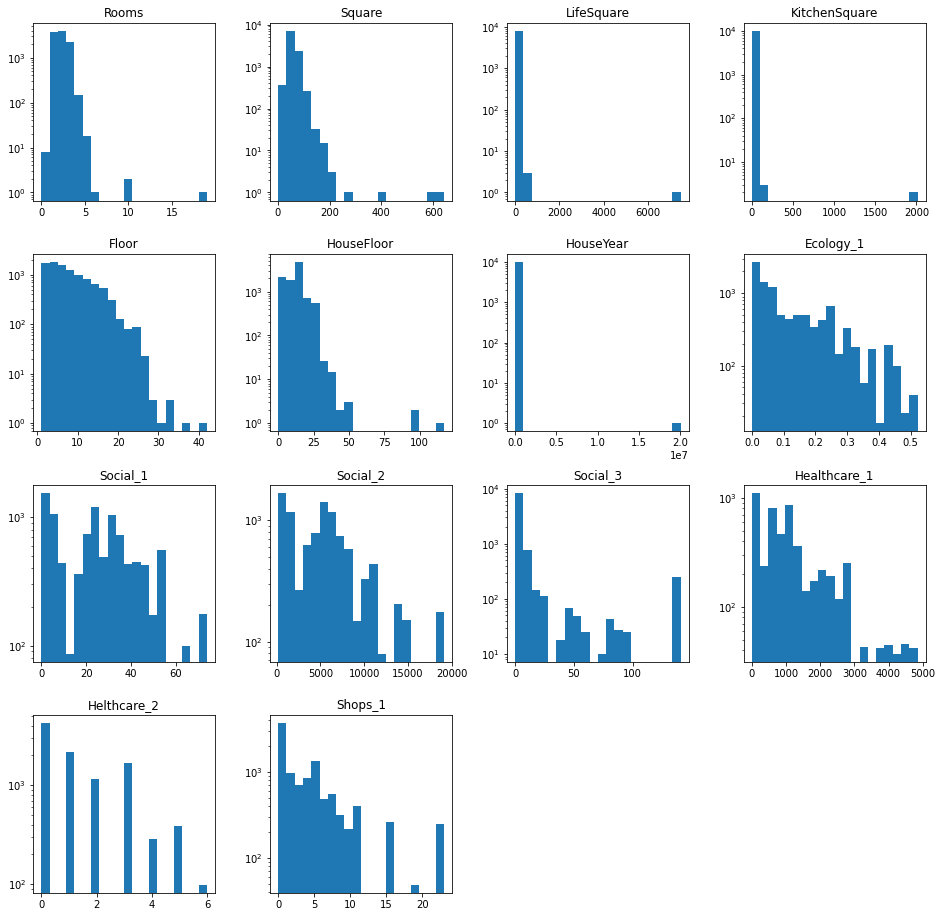

In [12]:
train_df_num_features = train_df.select_dtypes(include=['float64', 'float32', 'float16', 'int64', 'int32', 'int16', 'int8'])

train_df_num_features.hist(figsize=(16,16), bins=20, grid=False, log=True);

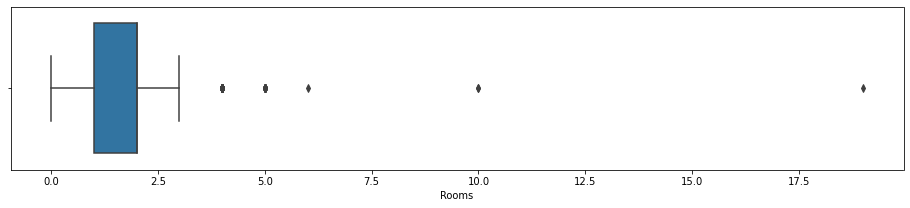

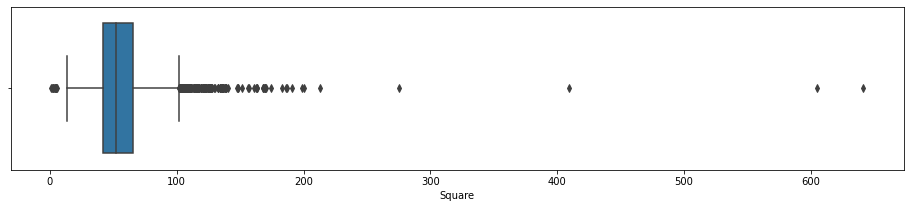

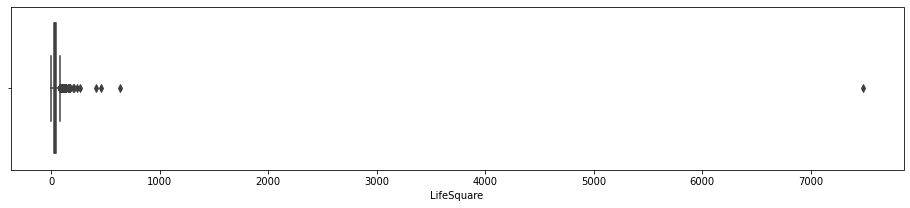

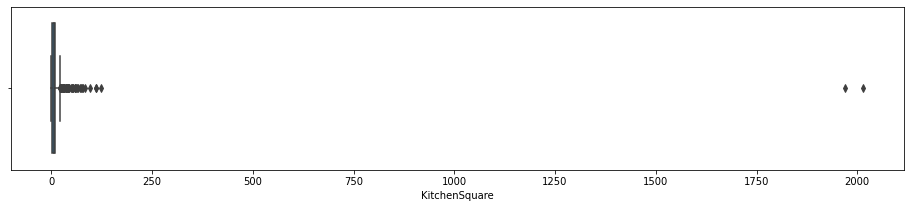

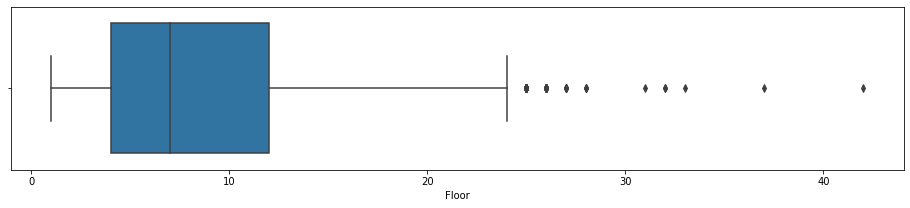

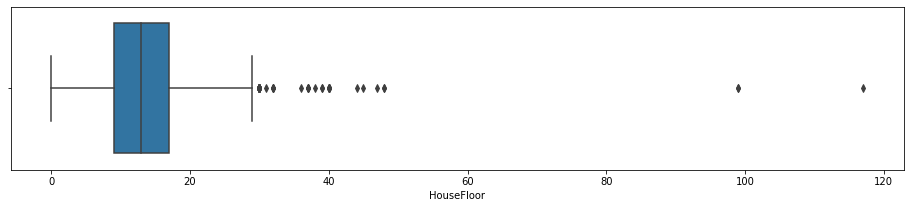

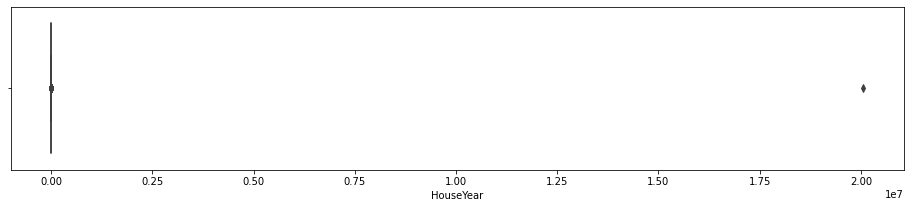

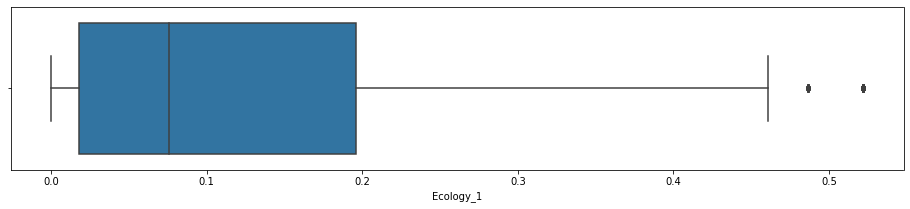

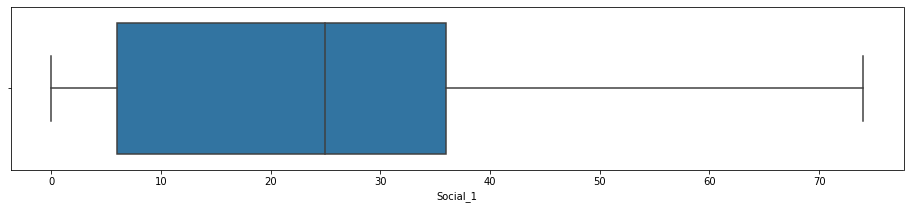

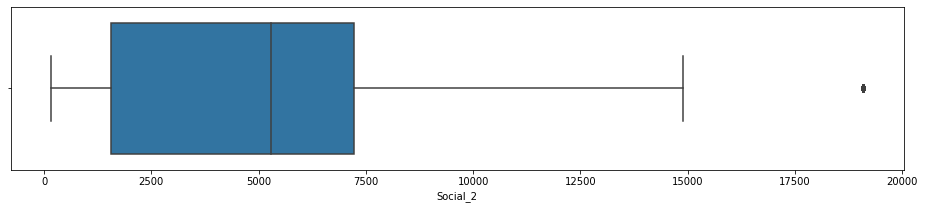

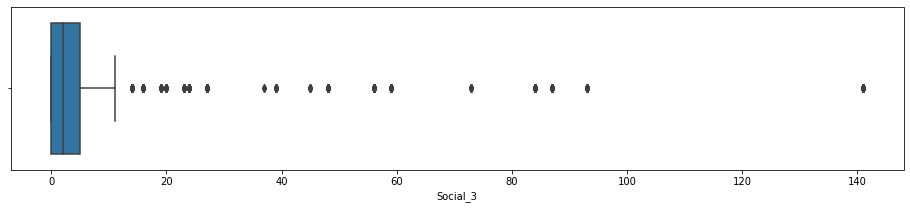

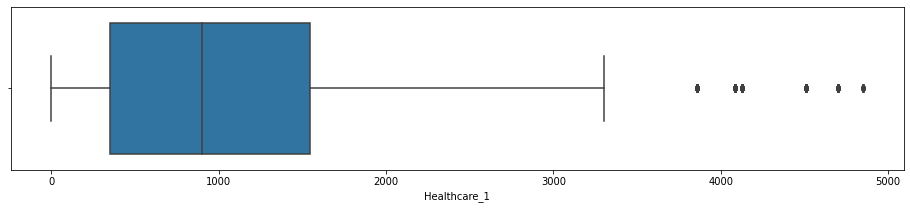

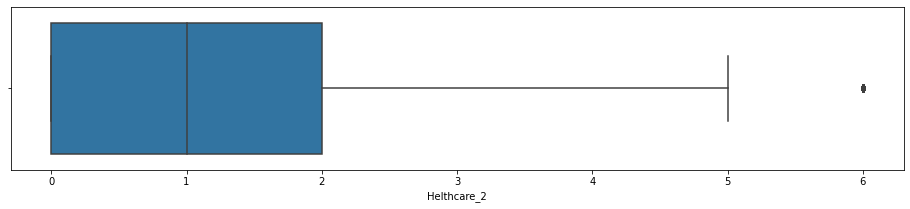

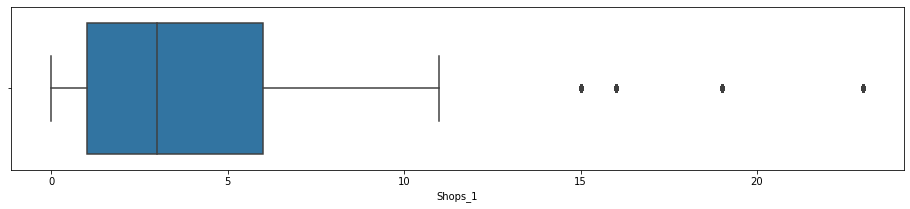

In [13]:
for feature in train_df_num_features:
    plt.figure(figsize=(16, 3))

    sns.boxplot(train_df[feature], whis=1.5)

    plt.xlabel(feature)
    plt.show()

<font color="red">
1. Пропуски имеют параметры: LifeSquare, Healthcare_1<br>
2. Число комнат Rooms не может быть равно нулю или больше 6. Имеются выбросы<br>
3. Площадь квартиры Square не может быть меньше 10 м2 и больше 250 м2. Имеются выбросы<br>
4. Жилая площадь LifeSquare не может быть больше общей площади, в ней также имеются выбросы<br>
5. Площадь кухни KitchenSquare не может быть меньше 4 м2 или больше 50 м2, а также больше общей площади, в ней имеются выбросы<br>
6. Этаж Floor имеет выбросы
7. Число этажей в доме HouseFloor не может быть равно нулю, также имеет выбросы<br>
8. Год постройки дома HouseYear не может быть отрицательным, не может быть меньше 1900 и не может быть больше текущего года<br>
9. Почти все признаки имеют выбросы<br>
10. Признаки имеют большой разброс значений, поэтому требуется их стандартизация
</font>

#### Качественные переменные

In [14]:
categorial = train_df.select_dtypes(include='object').columns.tolist()
categorial

['Ecology_2', 'Ecology_3', 'Shops_2']

In [15]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [16]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [17]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

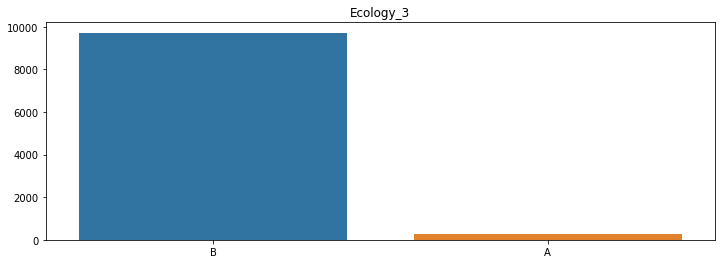

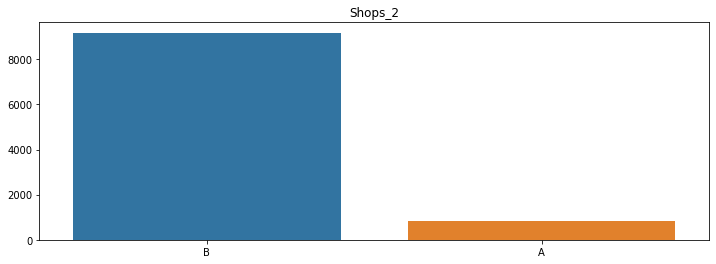

In [18]:
for cat in categorial[1:]:
    counts = train_df[cat].value_counts()
    
    plt.figure(figsize=(12,4))    
    plt.title(cat)
    sns.barplot(counts.index, counts.values)

    plt.show()

<font color="red">
Качественные (категориальные) признаки не сбалансированы, что не очень хорошо для модели, поэтому их надо удалить
</font>

#### Матрица корреляций

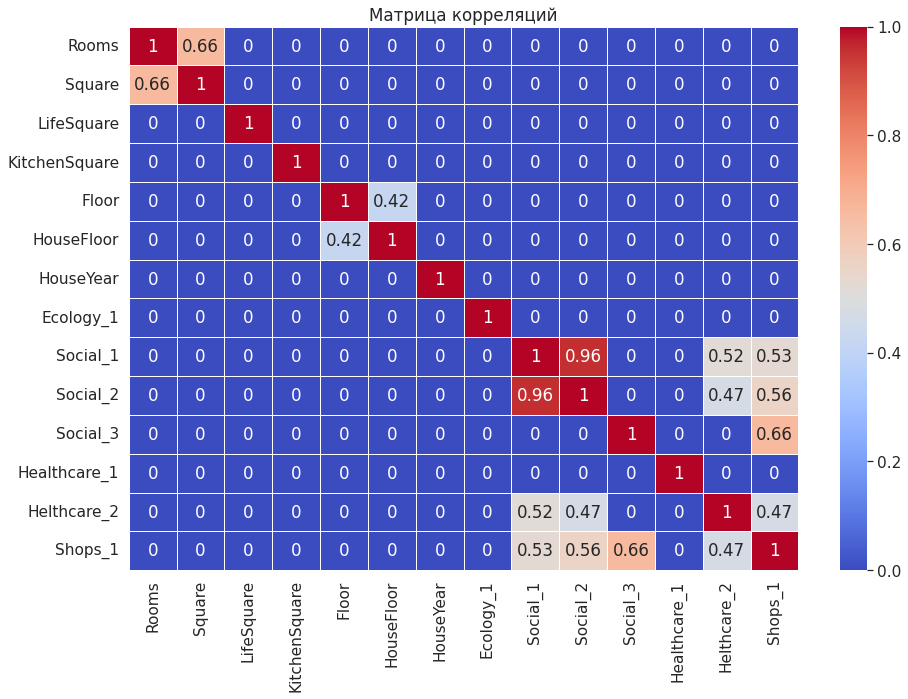

In [19]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица корреляций')
plt.show()

<font color="red">
1. Параметры Social_1 и Social_2 сильно связаны. По сути, можно утверждать, что Social_2 - масштабированные значения Social_1 (так как их масштаб больше). Поэтому Social_2 можно из модели исключить.<br>
2. Параметры Suare и Rooms также достаточно сильно связаны, но их оставим в модели.
</font>

# 4. Предобработка данных (заполнение пропусков, обработка выбросов)

In [20]:
class Preproc:
    def get_data_num_features(self, data):
        # Получение массива количественных параметров
        self.data_num_features = data.select_dtypes(include=['float64', 'float32', 'float16', 'int64', 
                                                        'int32', 'int16', 'int8']).columns
        
    def get_data_cat_features(self, data):
        # Получение массива качественных параметров
        self.data_cat_features = data.select_dtypes(include='object').columns
    
    
    def replace_unnatural_values(self, data):
        # Обработка неестесственных значений параметров
        data.loc[data['Rooms'] == 0.0, 'Rooms'] = data.loc[data['Rooms'] > 0.0, 'Rooms'].median()

        data.loc[data['Square'] < 10.0, 'Square'] = data.loc[data['Square'] >= 10.0, 'Square'].median()

        max_square = data["Square"].max()
        max_square_80_prcnt = 0.8 * max_square
        max_square_20_prcnt = 0.2 * max_square

        data.loc[data['LifeSquare'] < 5.0, 'LifeSquare'] = data.loc[data['LifeSquare'] >= 5.0, 'LifeSquare'].median()
        data.loc[data['LifeSquare'] > max_square_80_prcnt, 'LifeSquare'] = data.loc[data['LifeSquare'] >= 5.0, 'LifeSquare'].median()

        data.loc[data['KitchenSquare'] < 4.0, 'KitchenSquare'] = data.loc[data['KitchenSquare'] >= 4.0, 'KitchenSquare'].median()
        data.loc[data['KitchenSquare'] > max_square_20_prcnt, 'KitchenSquare'] = data.loc[data['KitchenSquare'] >= 4.0, 'KitchenSquare'].median()

        data.loc[data['HouseFloor'] == 0.0, 'HouseFloor'] = data.loc[data['HouseFloor'] > 0.0, 'HouseFloor'].median()

        data.loc[data['HouseYear'] <= 0.0, 'HouseYear'] = data.loc[data['HouseYear'] > 0.0, 'HouseYear'].median()
        
 

    def get_medians(self, data):
        # Расчет медианных значений количественных параметров
        self.medians = data[self.data_num_features].median()
        
        
    def fill_gaps(self, data):
        # Заполнение пропусков данных
        for feature in self.data_num_features:
            data[feature].fillna(self.medians[feature], inplace=True)
            
    
    def process_outliers(self, data):
        # Обработка выбросов данных
        # Найдем выбросы с помощью квантилей. 
        #Наблюдения, значения которых больше 97,5% квантиля и которые меньше 2,5% квантиля 
        #будем считать выбросами и заменять на медиану.
        for feature in self.data_num_features:
            max_feature = np.quantile(data[feature], q=0.975)
            min_feature = np.quantile(data[feature], q=0.025)
            condition_feature = (data[feature] > max_feature) | (data[feature] < min_feature)
            data.loc[condition_feature, feature] = self.medians[feature]
    
    
    def drop_categorical(self, data):
        data.drop(self.data_cat_features, axis=1, inplace=True)
    
    
    def replace_categorical_by_binnaries(self, data):
        # Замена категориальных переменных бинарными (dummy)
        for cat in self.data_cat_features:
            data = pd.concat([data, pd.get_dummies(data[cat], prefix=cat)], axis=1)
            data.drop(cat, axis=1, inplace=True)        
            
        
    def standartize_features(self, data):
        # Стандартизация признаков
        scaler = MinMaxScaler()
        column_names = data.columns.tolist()
        data[column_names] = pd.DataFrame(scaler.fit_transform(data), columns=column_names)

In [21]:
preproc = Preproc()

In [22]:
train_df.drop('Social_2', axis=1, inplace=True) # Удаление столбца Social_2
preproc.get_data_num_features(train_df)
preproc.get_data_cat_features(train_df)
preproc.replace_unnatural_values(train_df)
preproc.get_medians(train_df)
preproc.fill_gaps(train_df)
preproc.process_outliers(train_df)
preproc.drop_categorical(train_df)
preproc.standartize_features(train_df)

In [23]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.426500,0.333818,0.281567,0.360388,0.333074,0.493679,0.443158,0.256812,0.358878,0.049825,0.282863,0.254000,0.196911
std,0.378302,0.221153,0.185187,0.209341,0.242654,0.251408,0.290199,0.251125,0.244326,0.119778,0.174897,0.283725,0.198796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.149262,0.185828,0.250000,0.157895,0.333333,0.271186,0.040301,0.123077,0.000000,0.244648,0.000000,0.052632
50%,0.500000,0.296055,0.251659,0.375000,0.263158,0.541667,0.305085,0.172245,0.369231,0.021505,0.266055,0.200000,0.157895
75%,0.500000,0.471470,0.356681,0.375000,0.473684,0.666667,0.682203,0.431126,0.523077,0.043011,0.266055,0.400000,0.263158
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 5. Разбиение данных на train и valid

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df, target, test_size=0.30)

# 6. Построение модели

In [25]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

<font color="red">С помощью GridSearchCV были подобраны параметры модели</font>

In [26]:
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=17, # глубина дерева  
                                 min_samples_leaf=3, # минимальное кол-во наблюдений в листе дерева
                                 max_features=11,
                                 random_state=42,
                                 n_estimators=100  # кол-во деревьев
                                 )
# Обучение модели
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=17, max_features=11, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

R2:	0.893
RMSE:	30361.121


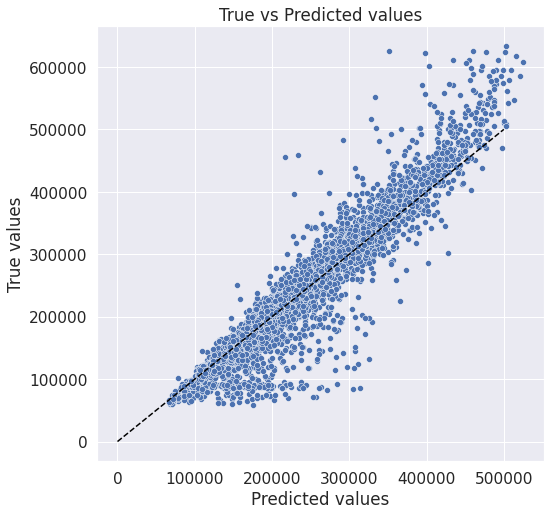

In [27]:
# Получение прогноза по тестовым данным
y_train_preds = rf_model.predict(X_train)

# Оценка качества работы модели на тестовых данных
evaluate_preds(y_train, y_train_preds)

R2:	0.724
RMSE:	48954.34


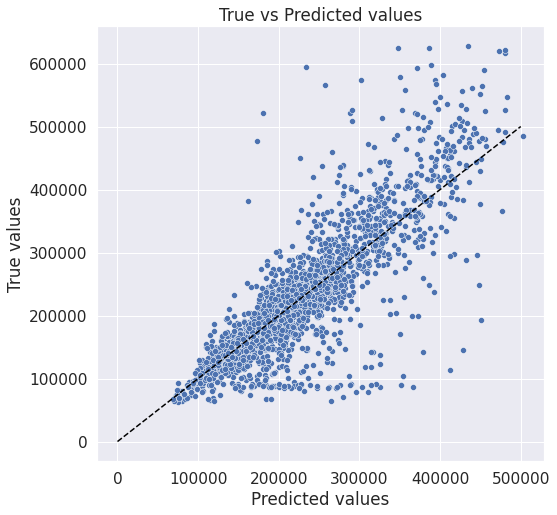

In [28]:
# Получение прогноза по валидационным данным
y_valid_preds = rf_model.predict(X_valid)

# Оценка качества работы модели на валидационных данных
evaluate_preds(y_valid, y_valid_preds)

#### Оценка важности признаков

In [29]:
imp = rf_model.feature_importances_
print(imp)

[0.17377294 0.27053455 0.06323453 0.02962097 0.02630625 0.02853978
 0.04661049 0.05662858 0.09649953 0.12905227 0.02716999 0.01663287
 0.03539724]


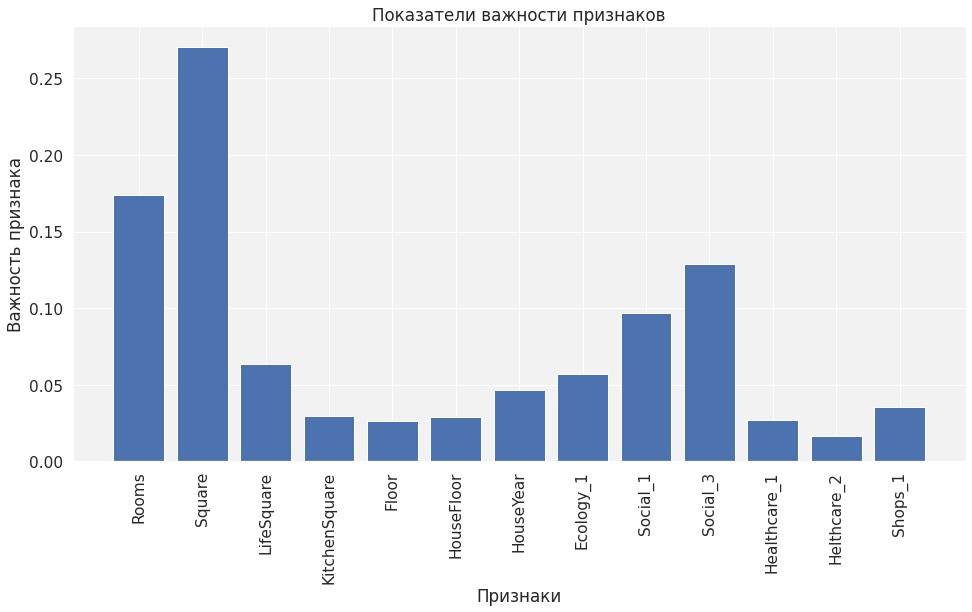

In [30]:
plt.rcParams.update({'font.size': 14})  # размер шрифта на графиках

fig, ax = plt.subplots()

ax.bar(train_df.columns, imp)

ax.set_facecolor('#f2f2f2')
fig.set_figwidth(16)    #  ширина
fig.set_figheight(8)    #  высота
plt.title("Показатели важности признаков")
plt.xlabel("Признаки")
plt.ylabel("Важность признака")
plt.xticks(rotation='vertical')
plt.show()

<font color="red">Все оставшиеся признаки достаточно важные. Также модель имеет достаточно хороший показатель R2 на валидационной выборке. Переобучим модель на всей тестовой выборке</font>

In [31]:
# Обучение модели на всей исходной выборке
rf_model.fit(train_df, target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=17, max_features=11, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

# 7. Предсказание тестовых данных

### Загрузка тестовых данных

In [32]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


### Предобработка данных

In [33]:
test_df.drop('Social_2', axis=1, inplace=True) # Удаление столбца Social_2
id_col = test_df['Id']
test_df = test_df.drop('Id', axis =1 )         # Удаление столбца Id
test_df = test_df.drop('DistrictId', axis =1 ) # Удаление столбца DistrictId

preproc.replace_unnatural_values(test_df)
preproc.fill_gaps(test_df)
preproc.process_outliers(test_df)
preproc.drop_categorical(test_df)
preproc.standartize_features(test_df)

### Предсказание

In [34]:
y_test_preds = rf_model.predict(test_df)

# 8. Сохранение результатов

In [35]:
pred_df = pd.DataFrame(
    {'Id': id_col,
     'Price': y_test_preds.round(2)
    })

# Специально сделал такой же индекс, как и в тестовых данных. 
# Если этого не сделать, индекс в датасете будет от 0 и по возрастающей, 
# но тогда теряется связь между тестовыми и предсказанными данными
pred_df.set_index('Id', inplace=True)

pred_df.to_csv(RESULT_DATASET_PATH)